In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat

from numpy.linalg import svd

In [2]:
import os
for i in os.listdir():
    if 'mat' in i:
        print(i)

bird_small.mat
ex7data1.mat
ex7data2.mat
ex7faces.mat


In [3]:
X = loadmat('ex7data1.mat')['X']

In [4]:
X.shape

(50, 2)

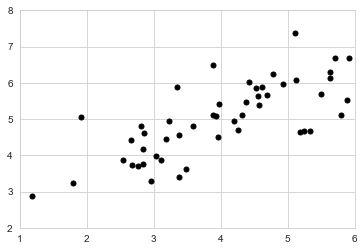

In [5]:
plt.plot(X[:,0], X[:,1], 'ko', ms=5)
plt.xlim(1,6)
plt.ylim(2,8);

In [6]:
def normalize(x):
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    
    x = (x-mean) / (std)
    
    return x, mean, std

In [7]:
def pca(norm_x):
    
    m = norm_x.shape[0]
    
    sigma =  (1/m) * np.dot(norm_x.T, norm_x)

    U,S,V = svd(sigma)
    
    
    return U,S

In [8]:
scaled_X,mean,std = normalize(X)

In [9]:
U,S = pca(scaled_X)

In [10]:
print('Top eigenvector:{}'.format(U[:,0:1].T))

Top eigenvector:[[-0.70710678 -0.70710678]]


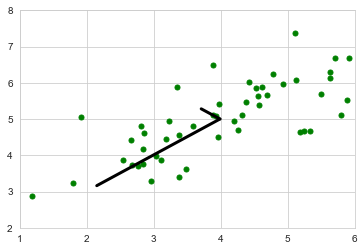

In [11]:
plt.plot(X[:,0], X[:,1], 'go', ms=5)

plt.plot([mean[0],(mean+1.5*S[0]*U[:,0].T)[0]],[mean[1],(mean+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mean[0],(mean+1.5*S[1]*U[:,1].T)[0]],[mean[1],(mean+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

plt.xlim(1,6)
plt.ylim(2,8);

In [12]:
def project_Data(U,norm_x, k):

    U = U[:,0:k].T
    
    
    m = norm_x.shape[0]
    Z = np.zeros((m , k))
    
    
    for i in range(m):
    
        Z[i] = np.dot(U, norm_x[i])
    
    return Z

In [13]:
# Project the data onto K=1 dimension
K=1

Z = project_Data(U, scaled_X, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


In [14]:
def recover_Data(z,u,k):
    
    u = u[:,0:k].T
    
    x_approx = np.dot(z,u)
    
    return x_approx

In [15]:
scaledX_approx = recover_Data(Z,U,K)

In [16]:
print("Approximation of the first example:{} ".format(scaledX_approx[0,:]))

Approximation of the first example:[-1.05805279 -1.05805279] 


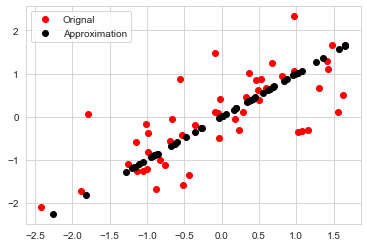

In [17]:
plt.plot(scaled_X[:,0], scaled_X[:,1], 'ro', label='Orignal')
plt.plot(scaledX_approx[:,0], scaledX_approx[:,1], 'ko', label = 'Approximation')
plt.legend();


# Face Dataset

In [18]:
img = loadmat('ex7faces.mat')['X']

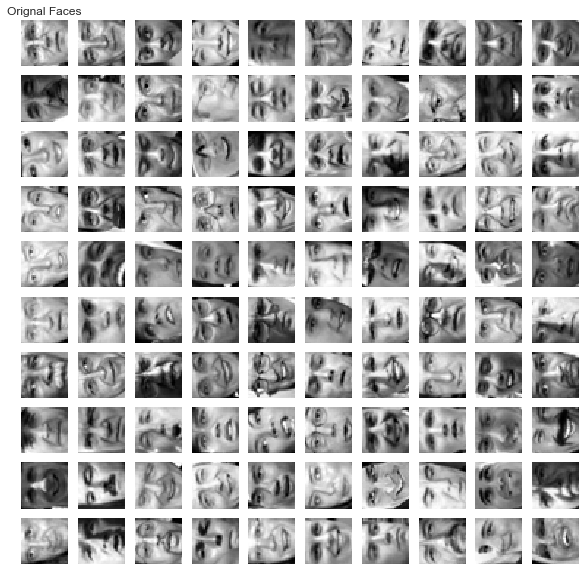

In [19]:
rows = 10
cols=10
fig, axes = plt.subplots(rows,cols, figsize=(10,10))
axes = axes.flatten()
training_data = len(img)
axes[0].set_title('Orignal Faces')
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(img[index].reshape(32,32), cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2);

In [20]:
img.shape

(5000, 1024)

# Reducing Features of the faces from 1024 to 100

In [21]:
scaled_img, mean, std = normalize(img)

In [22]:
U,S = pca(scaled_img)

In [23]:
U.shape

(1024, 1024)

In [24]:
K = 100

Z = project_Data(U, scaled_img, K)

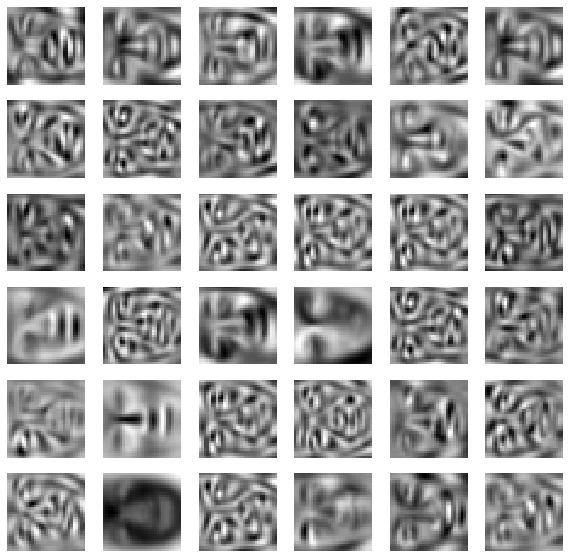

In [25]:
# first 100 values of U transposed
k_U = U[:,0:K].T

# Plotting the first 100 U values
rows = 6
cols=6
fig, axes = plt.subplots(rows,cols, figsize=(10,10))
axes = axes.flatten()
training_data = len(k_U)
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(k_U[index].reshape(32,32), cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [26]:
# Recovering the approximate of orignal data in the orignal dimensions

img_approx = recover_Data(Z,U,K)

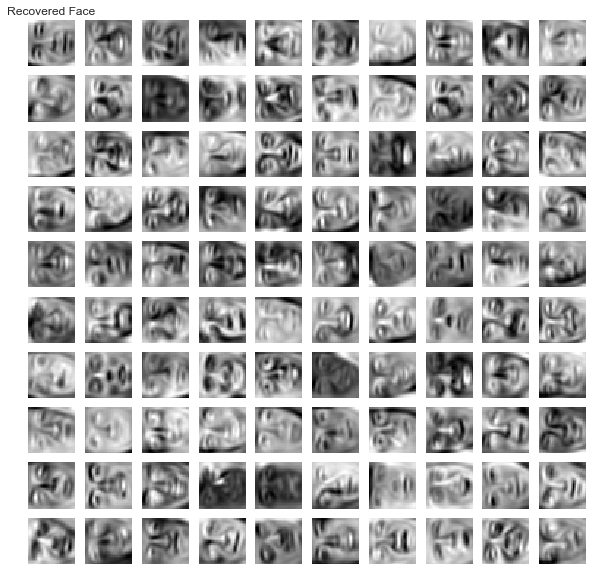

In [27]:
rows = 10
cols=10

fig, axes = plt.subplots(rows,cols, figsize=(10,10))
axes = axes.flatten()
training_data = len(img_approx)
axes[0].set_title('Recovered Face')
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(img_approx[index].reshape(32,32), cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2);
